In [1]:
%run "../../shared/utilz_includez.ipynb"

# Libraries list
- **Numpy:** For linear algebra math 
- **Matlab:** Is not free. NumPy is lite equivalent that is open source 
- **SymPy:**
- **SciPy:** 

# What is a Vector?
- [SciPy 2019 Tutorial](https://www.youtube.com/watch?v=4-P0gptDT40)
- [Related Git page & notebooks](https://github.com/engineersCode/EngComp4_landlinear)


[Part 1]https://github.com/engineersCode/EngComp4_landlinear/blob/master/notebook_en/01_Transform_all_the_Vectors.ipynb_

In [4]:
# from urllib.request import urlretrieve
# URL = 'https://go.gwu.edu/engcomp4plot'
# urlretrieve(URL, 'plot_helper.py')

from plot_helper import * 

Text(0.5, 1.0, 'Same vector with different tail locations')

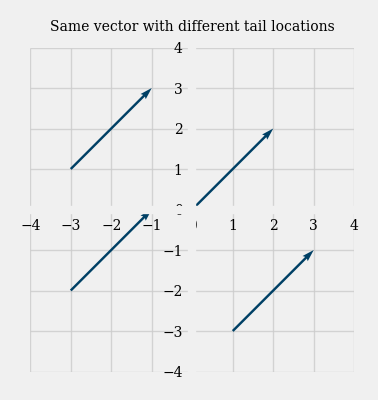

In [5]:
## plot the vector (2,2) with different tails
plot_vector([(2,2)], [(-3, -2), (-3, 1), (0,0), (1, -3)])
plt.title('Same vector with different tail locations')

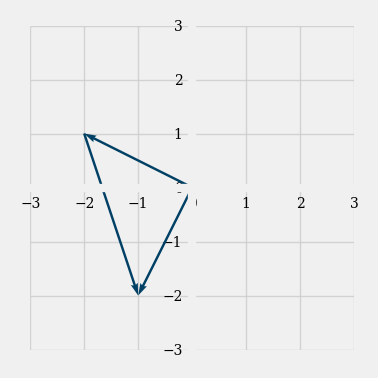

In [6]:
### Summation of two vectors 
a = np.array([-2, 1])
b = np.array([1, -3])
origin = np.array([0,0])
vectors = [ a, b, a+b]
tails = [origin, a, origin]

plot_vector(vectors, tails)

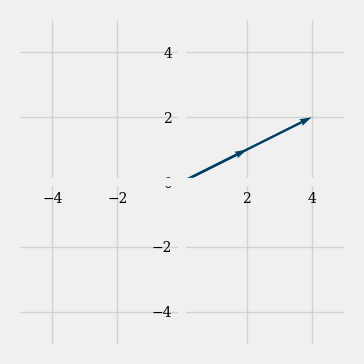

In [7]:
### Scaling a vector by a scalar 
c = np.array([2, 1])
vectors = [c, c*2]
plot_vector(vectors) ## tails default to origin

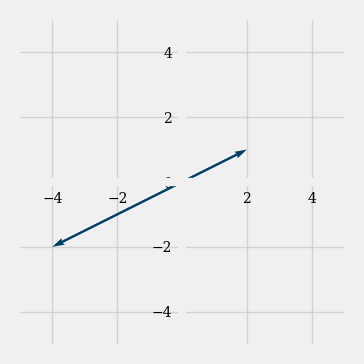

In [8]:
#### scaling with a a negative scalar 
vectors = [c, c*-2]
plot_vector(vectors) ## tails default to origin

# Basis Vectors
- i = (1,0) is a horizontal vector
- j = (0, 1) is a vertical vector 

**Linear Combination** adding together scaled versions of vectors 
- Any vertical or horizontal vector can be scaled by 1/x to get i or j 
- And can add the resulting horizontal and vertical vectors to derive any vector 

**Span** the set of all possible linear combinations 
- The span of i and j is the entire 2-D plane and that's why they are **basis vectors**; can gen any vector in that plane using linear combos of their scaled versions

**Linear independence** is neccessary to be able to span the entire space and, therefore, be a basis
- A basis for a given space is a set of **linearly independent** vectors that span the space 
- In a 2-D plane we need two elements to have a full set

[3 2]


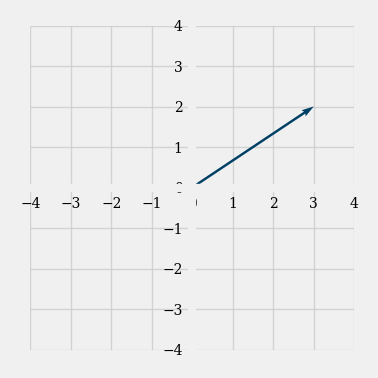

In [14]:
## Linear combinations 
i = np.array( (1,0))
j = np.array( (0,1) )

vec = 3*i + 2*j
print(vec)

plot_vector([i, j, 3*i, 2*j, vec])

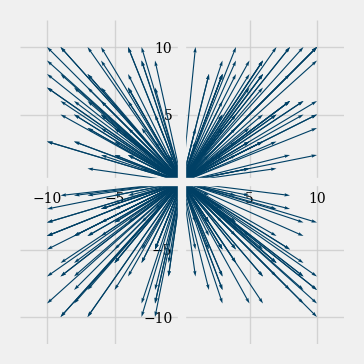

In [20]:
### Span

# generate random range of linear combi vecx
from random import randint
vectors = []

for _ in range(300):
    m = randint(-10, 10)
    n = randint(-10, 10)
    vectors.append( m*i+n*j )
    

plot_vector( vectors)


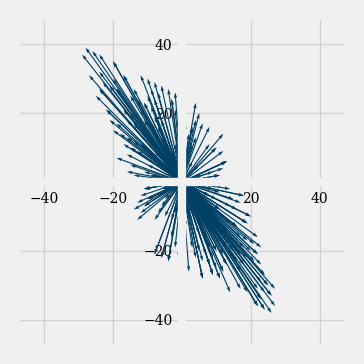

In [21]:
## Ditto with a and b instead of i and j <<< Point is that can choose different basis vectors a nd span the entire 2-d plane
vectors = []

for _ in range(300):
    m = randint(-10, 10)
    n = randint(-10, 10)
    vectors.append( m*a+n*b )
    

plot_vector( vectors)


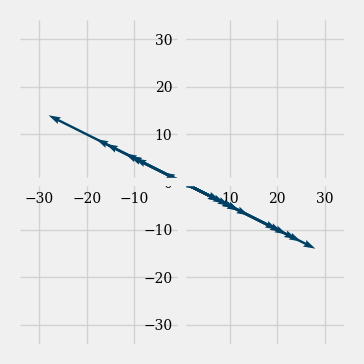

In [24]:
## using a and d as basis  vector <<< In this case a and d are colinear and so their span is just one line and not the entire 2d space
d = np.array( (-1, 0.5) )
vectors = []

for _ in range(30):
    m = randint(-10, 10)
    n = randint(-10, 10)
    vectors.append( m*a+n*d )
    

plot_vector( vectors)




# Matrix

In [27]:
# recall AND c = 2*i + j
for x , l in zip([a, b, c, d], ['a', 'b', 'c', 'd']):
    print( f"{l} == {repr(x)}")
    
    
## use c to make linear combinations of a and b

a == array([-2,  1])
b == array([ 1, -3])
c == array([2, 1])
d == array([-1. ,  0.5])


In [37]:
A = [[-2, 1], [1, -3]]

print("before np >>>", repr(A))

A = np.array(A)
print( "\nafter np >>>", repr(A))

A = np.array([a, b])
print( "\nafter linear combs >>>", repr(A))

before np >>> [[-2, 1], [1, -3]]

after np >>> array([[-2,  1],
       [ 1, -3]])

after linear combs >>> array([[-2,  1],
       [ 1, -3]])


In [38]:
A.dot(c)

array([-3, -1])

In [39]:
A.dot(i) ## results in vector a

array([-2,  1])

In [42]:
A.dot(j) ## results in b <<< A reps a linear transformation of i,j to a, b

array([ 1, -3])

**The matrix A reps a linear transformation of basis i,j to a, b**
- So by knowing what A does to i and j we know what it does to any vector in that space


**Requirements** For the matrix transformation to be linear 
- The origin remains at the same location after transformation 
- All straight lines remain straight lines and distance between remains uniform.

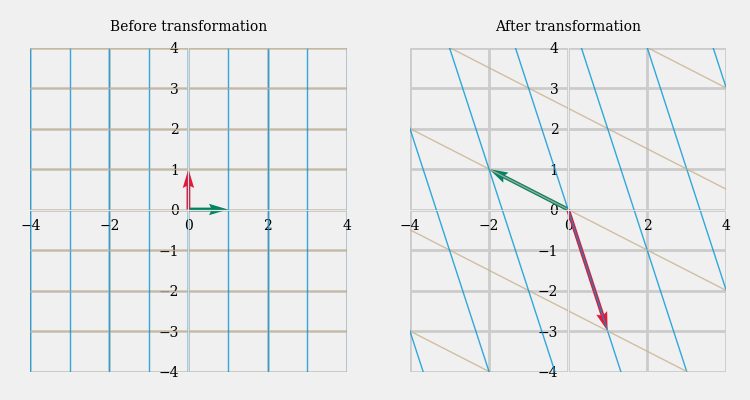

In [44]:
plot_linear_transformation(A)

[[1 2]
 [2 1]]


(array([1, 2]), array([2, 1]))

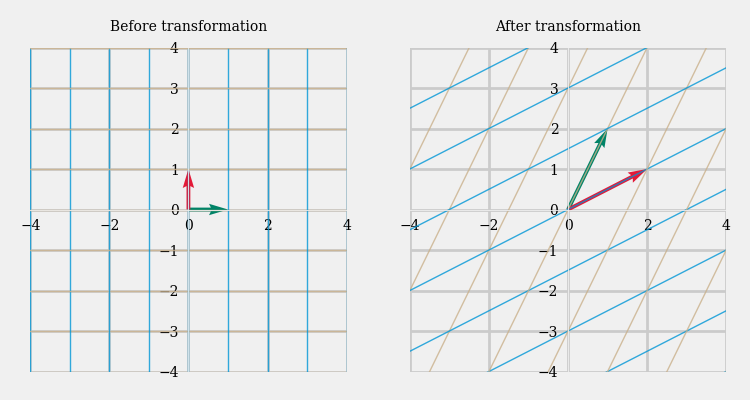

In [50]:
M = np.array([(1,2), (2,1)]) ###<< First col reps i landing point and second reps j, which are the basis vectors
print(M)

## so 
M.dot(i), M.dot(j)

plot_linear_transformation(M)

[2.5 2. ]


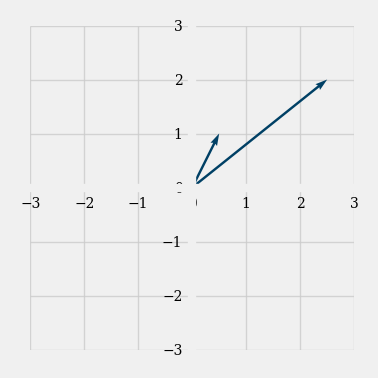

In [52]:
x = np.array( (0.5, 1))
print( M.dot(x))
vectors = [x, M.dot(x)]
plot_vector(vectors)

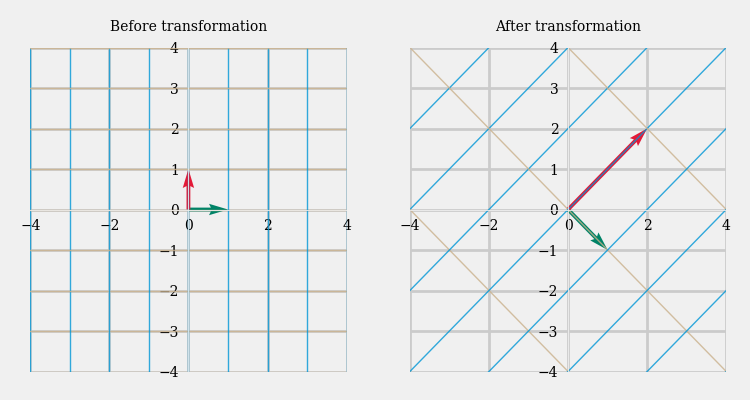

In [53]:
plot_linear_transformation(np.array([[1,2], [-1, 2]]))

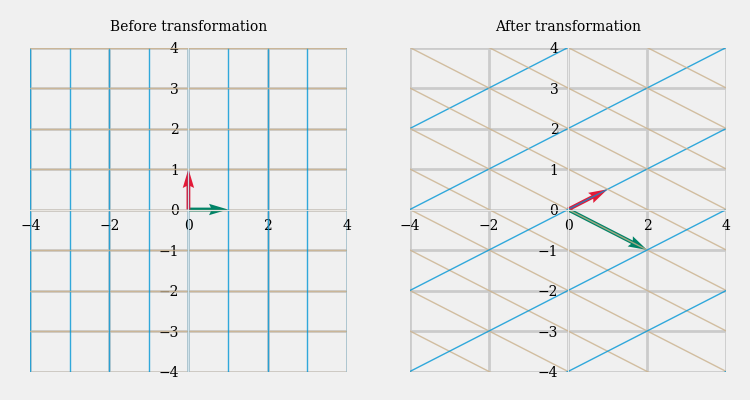

In [63]:
plot_linear_transformation(np.array([c, d]))

# Matrix - Vector Multiplication

- A * v is the same as doing a linear combination of the columns scaled by the vector v coordinates so that if A = [a b] then Av = va + vb. So it's a linear transformation : It's a linear combination of the columns of A scaled by the components of v

- This translates to higher dimensions as well. The vector components represent the scaling factor for each column of the matrix. The result is a vector in the space spanned by v??

# Special Transformations
## 1. Rotation
- E.G. anticlockwise 90 degrees rotation moves i (1,0) to (0,1) and j (0,1) to (-1, 0)

[[ 0 -1]
 [ 1  0]]


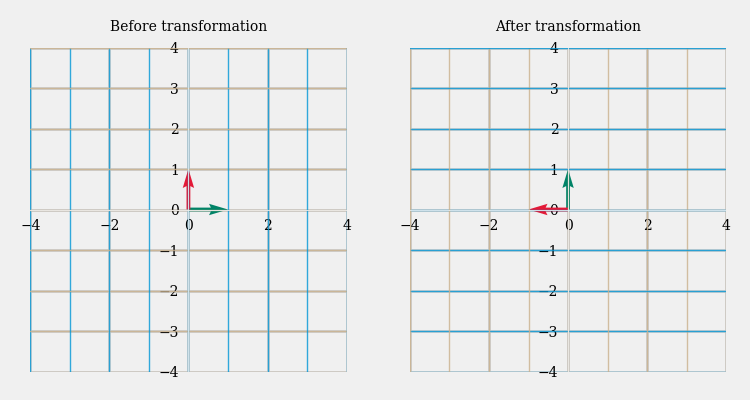

In [64]:
rotation90 = np.array([[0, -1], [1, 0]])
print( rotation90)
plot_linear_transformation(rotation90)

## 2. Shear
- Things shift in either i or j and the other remains the same 
- E.g. i stays same as (1,0) and j moves to (1,1) 

[[1 1]
 [0 1]]


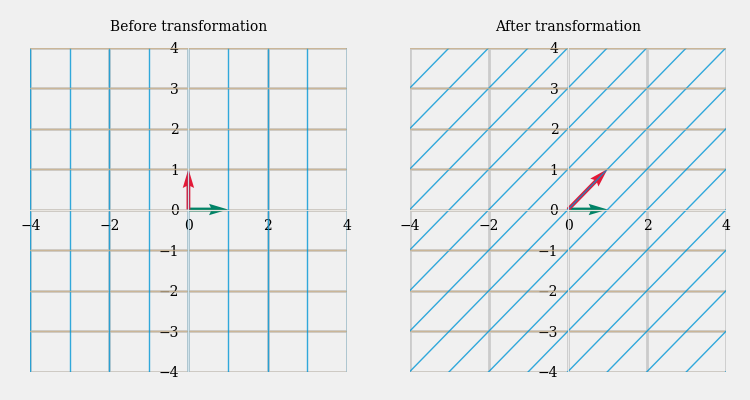

In [65]:
shear = np.array([[1, 1], [0,1]])
print(shear)
plot_linear_transformation(shear)

## 3. Scaling
- Doesn't rotate or shear. It just resizes/scales each by some factor
- E.G. double i and halve j would be by (2,0) on i and (0,0.5) on j

**Identity Matrix** a special scaling matrix 
- Leaves the i and j at the same length 

[[2.  0. ]
 [0.  0.5]]


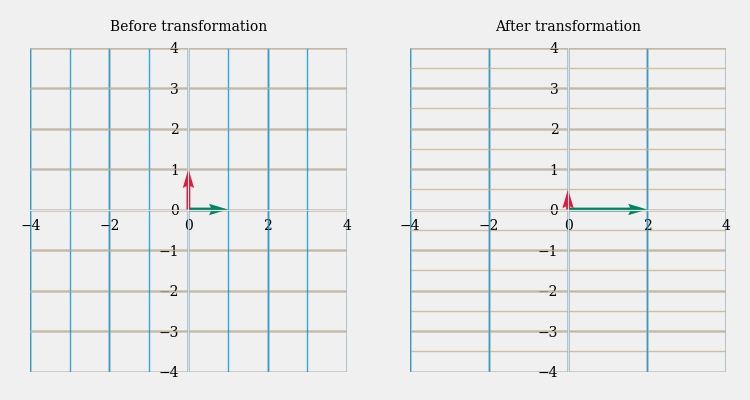

In [68]:
scale = np.array([[2,0], [0,0.5]])
print(scale)
plot_linear_transformation(scale)

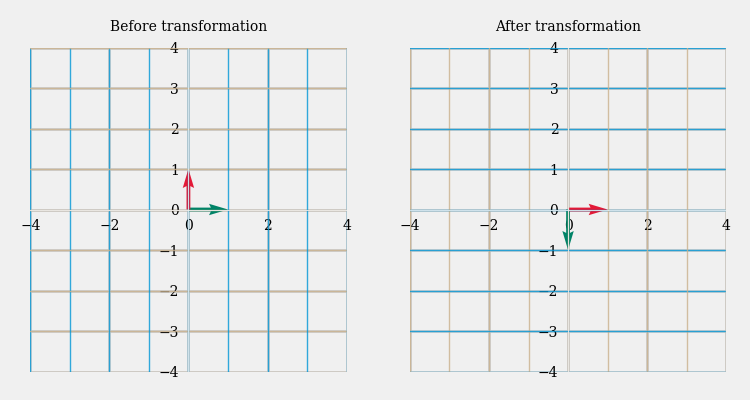

In [69]:
## Rotate counter clockwise --> i @ [0, -1] and j @ [1, 0]
plot_linear_transformation(np.array([[0,1], [-1, 0]]))

## 4. Combining Multiple Transformations

**Matrix-Matrix Multiplication** = Two Linear Transformations Sequentially
- E.G. Rotate and then Shear --> Rx and then Sx = SRx 
- SRx --> rotate and then shear. Applies R on x and then S on the results 
- RSx --> shear and then rotate. Applies S on x and then R on the result

- Order matters; it is not commutative. SR != RS

In [73]:
## recall
print( "Rotation: \n", rotation90)
print( "\nShear: \n", shear)
print( "\nScale: \n", scale)

Rotation: 
 [[ 0 -1]
 [ 1  0]]

Shear: 
 [[1 1]
 [0 1]]

Scale: 
 [[2.  0. ]
 [0.  0.5]]


[[ 0 -1]
 [ 1  1]]


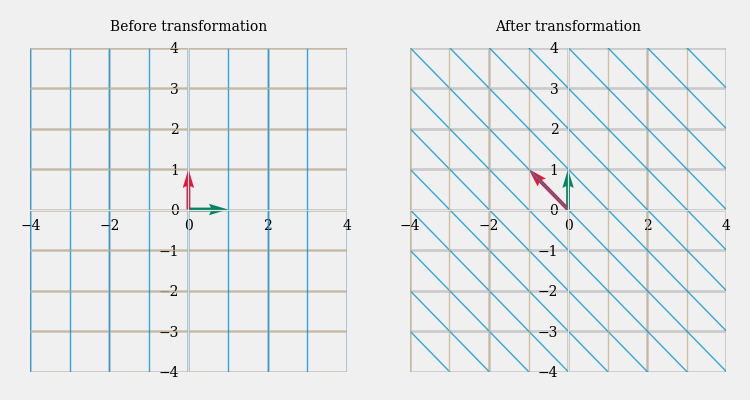

In [76]:
## So the resulting transformation is a matrix-matrix multiplication
rotate_shear = rotation90 @ shear ## << shear first and then rotate 

print(rotate_shear)

plot_linear_transformation( rotate_shear)

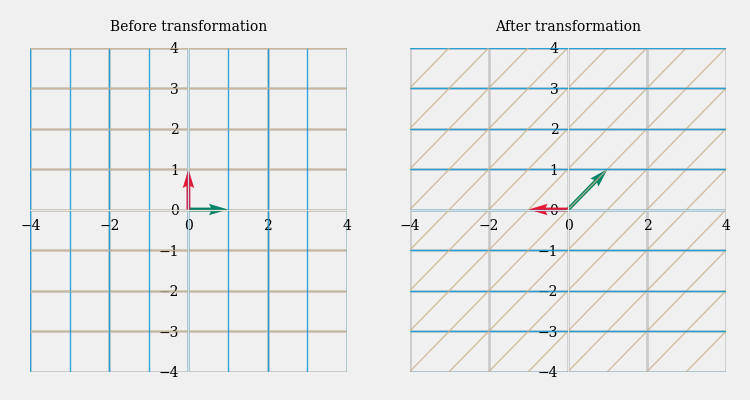

In [77]:
plot_linear_transformation( shear@rotation90) ##<< Order matters: rotate first and then shear

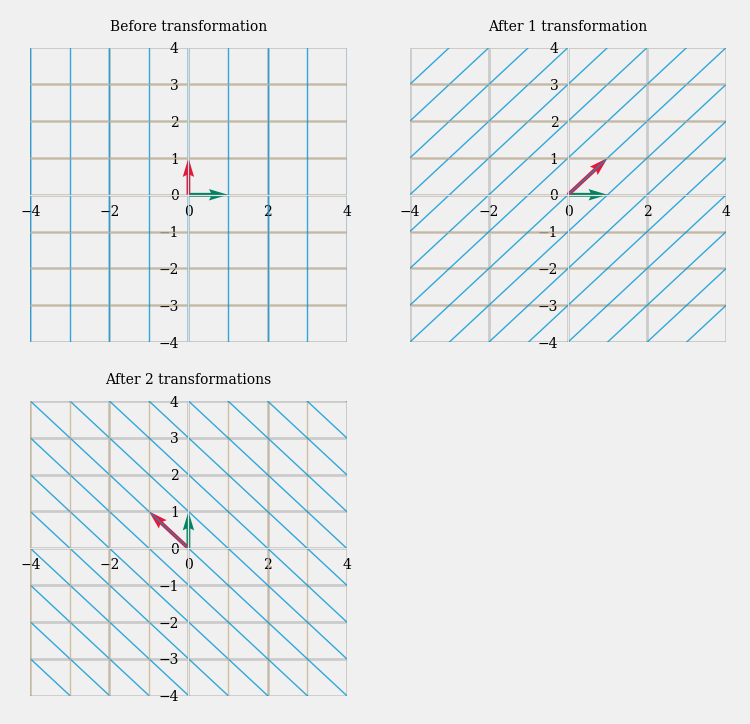

In [81]:
plot_linear_transformations( shear, rotation90)

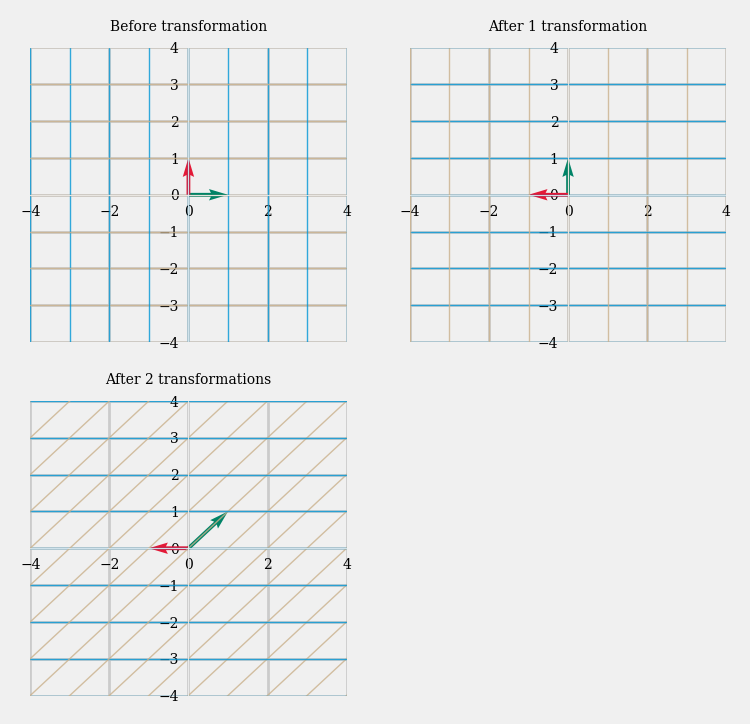

In [80]:
plot_linear_transformations(rotation90, shear)

## Inverse Matrix
- It undoes the linear transformation of another; The inveser of A undoes the linear transformation of A

- The combined effect of a matrix A and it's inverse is the Identity matrix and is such that nothing changes

In [82]:
from numpy import linalg

[[1 2]
 [2 1]]
inverse of M = 
[[-0.33333333  0.66666667]
 [ 0.66666667 -0.33333333]]


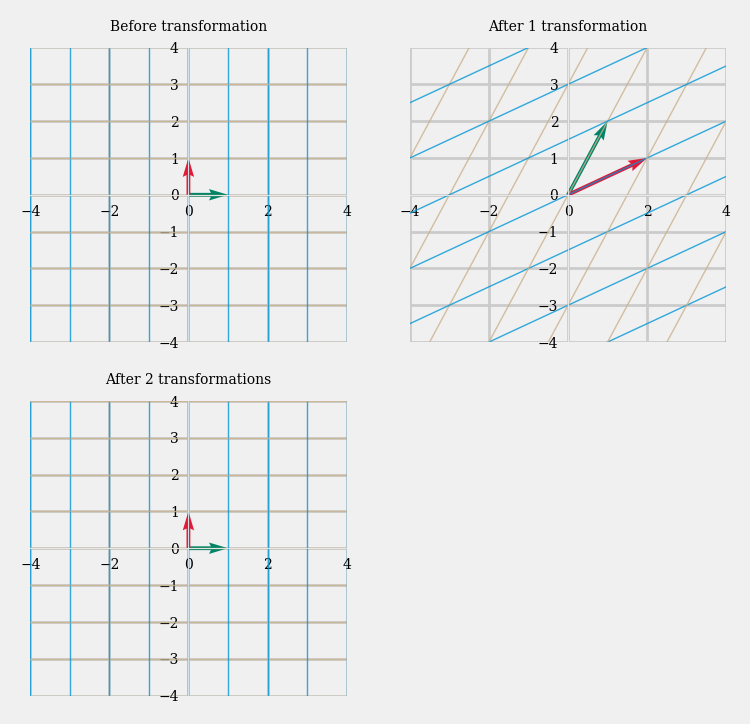

In [86]:
print(M)
print( f"inverse of M = \n{ linalg.inv(M)}" )

plot_linear_transformations(M, linalg.inv(M))

[Part 2 - Matrices](https://github.com/engineersCode/EngComp4_landlinear/blob/master/notebook_en/02_Matrix_is_Everywhere.ipynb)

# PART 2 - MATRICES

In [91]:
%matplotlib  inline

[[ 1  1]
 [-1  1]]


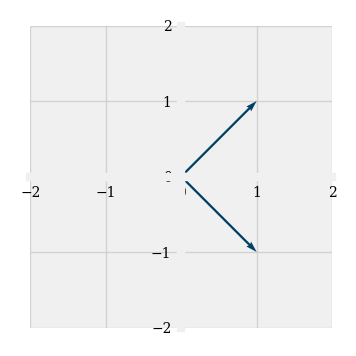

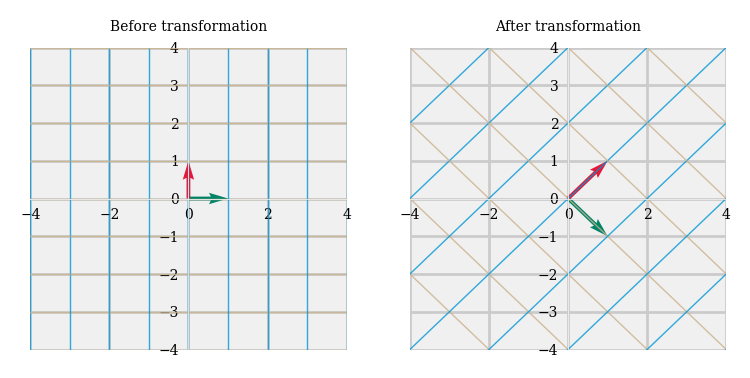

In [92]:
A = np.array( [ [1,1], [-1,1]])
print(A)
plot_vector([A])
plot_linear_transformation(A)